# Integração Numérica

Uma função aproximada por polinômio para funções que não podem ser integradas analiticamente.

## Importações

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Regra do Trapézio

Na Regra do Trapézio uma reta é utilizada como polinômio aproximador.

$$P_1(x) = a_0 + a_1x$$

A reta precisa ser definida de forma a passar pelos pontos $(a,f(a))$ e $(b,f(b))$, onde $a$ e $b$ definem o intervalo de integração.

$$\int_a^b P_1(x) \, dx = \frac{h}{2} [f(a) + f(b)]$$

Sendo o comprimento do subintervalo,

$$h = b − a$$

O erro cometido pode ser expresso por:

$$\epsilon = -\frac{1}{12}f''(\tau)h^3$$

em que $\tau$ é um valor entre $a$ e $b$, ou seja, $a ≤ \tau ≤ b$.

**1) Calcular numericamente o valor de**

$$\int_a^b I = \frac{1}{x}\, dx$$

In [5]:
a = 1.0
b = 6.0

# valor exato da integral
I = np.log(b) - np.log(a)

# regra do trapézio
h = b - a
fa = 1 / a
fb = 1 / b
Itrap = (h / 2) * (fa + fb)

# erro relativo
t = 1.5
fdev = 2 / t ** 3
erroRel = np.abs(-(1 / 12) * fdev * h ** 3)

print(f'I = {I:.5f}')
print(f'Itrap = {Itrap:.5f}')
print(f'erro relativo = {erroRel:.5f}')

I = 1.79176
Itrap = 2.91667
erro relativo = 6.17284


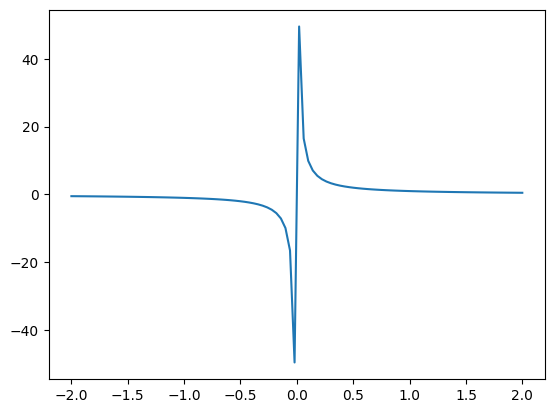

In [ ]:
plt.plot(np.linspace(a, b, 100), 1 / np.linspace(a, b, 100))
plt.show()

### Regra do Trapézio Composta

Na Regra Composta, subdivide-se o intervalo inicial $[a,b]$ em $n$ subintervalos, de forma que esses subintervalos tenham largura $h$ igual. Se somarmos cada área calculada, obtêm-se a integral para a Regra do Trapézio Composta:

$$I_t = \frac{h}{2} [f(x_0​) + 2f(x_1​) + 2f(x_2​) + ... + 2f(x_{n-1}) + f(x_n​)]$$

**Ideal para funções diferentes de uma reta.**

O erro cometido pode ser expresso por:

$$\epsilon = -\frac{n}{12}f''(\tau)h^3$$

em que $\tau$ é um valor entre $a$ e $b$, ou seja, $a ≤ \tau ≤ b$.

**2) Calcular a integral abaixo com $n=6$ aplicações da Regra do Trapézio:**

$$\int_{-2}^{2} \frac{x^2}{5} + 2\sin(x) \, dx$$

In [14]:
a = -2
b = 2
n = 6

def f(x):
  return (x ** 2 / 5) + 2 * np.sin(x)

Ireal = (b ** 3 / 15) - 2 * np.cos(b) - ((a ** 3 / 15) - 2 * np.cos(a))
print(f'Ireal = {Ireal:.4f}')

h = (b - a) / n
x = np.linspace(a, b, n + 1)
Itrap = np.trapz(f(x), x)
print(f'Itrap = {Itrap:.3f}')

t = np.linspace(a, b, 100)
fdev = (2 / 5) - 2 * np.sin(t)
e = np.max(np.abs(-(n / 12) * fdev * h ** 3))
print(f'erro máximo = {e:.5f}')

Ireal = 1.0667
Itrap = 1.126
erro máximo = 0.35552


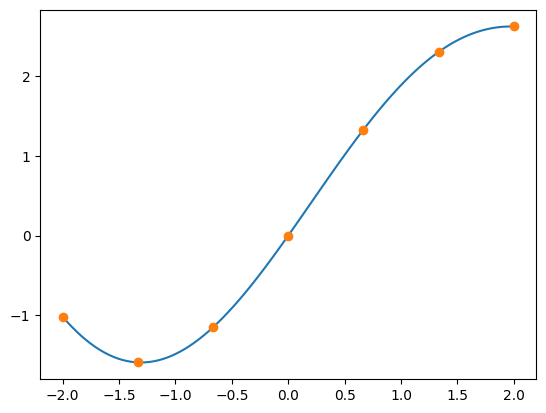

In [15]:
plt.plot(np.linspace(a, b, 100), f(np.linspace(a, b, 100)))
plt.plot(x, f(x), 'o')
plt.show()

## Regra 1/3 de Simpson

A regra 1/3 de Simpson utiliza uma parábola para aproximar a função no intervalo de integração, como vantagem tem um erro menor do que a regra do trapézio. É necessário 3 pontos de interpolação da função para encontrar o polinômio de segundo grau, sendo os pontos das extremidades $x_0 = a$ e $x_2 = b$. O $x_1$ é obtido pelo ponto médio entre $[a, b]$.

$$h = \frac{(b - a)}{2}$$

A integral pode ser aproximada pela seguinte fórmula:

$$\int_a^b P_2(x) \, dx = \frac{h}{3} (y_0 + 4y_1 + y_2)$$

O erro cometido pode ser calculado através da expressão:

$$\epsilon = -\frac{1}{90}f^{(4)}(\tau)h^5$$

onde $\tau \in [a, b]$.

### Regra 1/3 de Simpson Composta

Um pequeno ajuste é feito de modo a melhorar a aproximação na Regra 1/3 de Simpson, dividindo o intervalo $[a, b]$ em $2n$ subintervalos.

$$h = \frac{(b - a)}{2}$$

A integral composta calculada pela seguinte fórmula:

$$I_{\frac{1}{3}} = \frac{h}{3} [y_0 + 4y_1 + 2y_2 + 4y3 ... 2y_{2n-2} + 4y_{2n-1} + y_{2n}]$$

Para o erro cometido:

$$\epsilon = -\frac{n}{90}f^{(4)}(\tau)h^5$$

onde $\tau \in [a, b]$.

**3) Calcular a integral abaixo com $n=3$ aplicações da Regra 1/3 de Simpson:**

$$\int_{-2}^{2} \frac{x^2}{5} + 2\sin(x) \, dx$$

In [17]:
a = -2
b = 2
n = 3

h = (b - a) / (2 * n)
x = np.linspace(a, b, 2 * n + 1)
Area = 0
y = f(x)

for i in range(0, 2 * n, 2):
    Area += (h / 3) * (y[i] + 4 * y[i + 1] + y[i + 2])

print(f'Area = {Area:.5f}')

t = np.linspace(a, b, 100)
fdev = 2 * np.sin(t)
e = np.max(np.abs(-(n / 90) * fdev * h ** 5))
print(f'erro relativo = {e:.4f}')

Area = 1.06667
erro relativo = 0.0088


## Regra 3/8 de Simpson

Na regra 3/8 de Simpson é utilizado um polinômio de terceiro grau para aproximar a função $f(x)$ no intervalo $[a, b]$, de forma que são necessários 4 pontos para obter esse polinômio. Para isso divide-se o intervalo $[a, b]$ em três subintervalos igualmente espaçados de $h$.

$$h = \frac{(b - a)}{3}$$

Ficando a integral pelo método de Simpson 3/8:

$$\int_a^b P_3(x) \, dx = \frac{3h}{8} (y_0 + 3y_1 + 3y_2 + y_3)$$

E o erro pode ser expresso como:

$$\epsilon = -\frac{3}{80}f^{(4)}(\tau)h^5$$

onde $\tau \in [a, b]$.

### Regra 3/8 de Simpson Composto

Também, podemos dividir o intervalo em n vezes na regra composta de 3/8 de Simpson.

$$h = \frac{(b - a)}{3n}$$

Teremos uma área somada a todas escrita como:

$$I_{\frac{3}{8}} = \frac{3h}{8} [y_0​ + 3y_1 ​+ 3y_2​ + 2y_3​ + 3y_4​ + 3y_5 ​... + 2y_{3n−3} ​+ 3y_{3n−2} ​+ 3y_{3n−1}​ + y_{3n}]$$

o erro pode ser expresso como:

$$\epsilon = -\frac{3n}{80}f^{(4)}(\tau)h^5$$

onde $\tau \in [a, b]$.

**4) Calcular a integral abaixo com $n=2$ aplicações da Regra 3/8 de Simpson:**

$$\int_{-2}^{2} \frac{x^2}{5} + 2\sin(x) \, dx$$

In [19]:
a = -2
b = 2
n = 2

h = (b - a) / (3 * n)
x = np.linspace(a, b, 3 * n + 1)
Area = 0
y = f(x)

for i in range(0, 3 * n, 3):
    Area += (3 * h / 8) * (y[i] + 3 * y[i + 1] + 3 * y[i + 2] + y[i + 3])

print(f'Area = {Area:.5f}')

t = np.linspace(a, b, 100)
fdev = 2 * np.sin(t)
e = np.max(np.abs(-(3 * n / 80) * fdev * h ** 5))
print(f'erro relativo = {e:.5f}')

Area = 1.06667
erro relativo = 0.01975
